<a href="https://colab.research.google.com/github/KiSobral/Covid19-Analysis/blob/main/CovidAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
states_df = pd.read_csv('covid19-8be008a6f7a14dec9e22a3c1696abcb4.csv')

In [3]:
states_df.columns

Index(['date', 'state', 'city', 'place_type', 'confirmed', 'deaths', 'is_last',
       'estimated_population', 'city_ibge_code',
       'confirmed_per_100k_inhabitants', 'death_rate'],
      dtype='object')

In [4]:
states_df.head()

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-11,AC,NaN,state,32113,705,True,894470,12,3590.17072,0.0220
1,2020-11-11,AL,NaN,state,92040,2282,True,3351543,27,2746.19780,0.0248
2,2020-11-11,AM,NaN,state,167486,4655,True,4207714,13,3980.45114,0.0278
3,2020-11-11,AP,NaN,state,53790,770,True,861773,16,6241.78293,0.0143
4,2020-11-11,BA,NaN,state,367669,7859,True,14930634,29,2462.51432,0.0214


In [5]:
states_df = states_df.drop(["city", "place_type"], axis=1)

In [6]:
states_df.head()

,date,state,confirmed,deaths,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-11,AC,32113,705,True,894470,12,3590.17072,0.0220
1,2020-11-11,AL,92040,2282,True,3351543,27,2746.19780,0.0248
2,2020-11-11,AM,167486,4655,True,4207714,13,3980.45114,0.0278
3,2020-11-11,AP,53790,770,True,861773,16,6241.78293,0.0143
4,2020-11-11,BA,367669,7859,True,14930634,29,2462.51432,0.0214


In [7]:
uf_map = {
    'AC': 'Acre',
    'AL': 'Alagoas',
    'AM': 'Amazonas',
    'AP': 'Amapá',
    'BA': 'Bahia',
    'CE': 'Ceará',
    'DF': 'Distrito Federal',
    'ES': 'Espírito Santo',
    'GO': 'Goiás',
    'MA': 'Maranhão',
    'MG': 'Minas Gerais',
    'MT': 'Mato Grosso',
    'PA': 'Pará',
    'PB': 'Paraíba',
    'PE': 'Pernambuco',
    'PI': 'Piauí',
    'PR': 'Paraná',
    'RJ': 'Rio de Janeiro',
    'RO': 'Rondônia',
    'RS': 'Rio Grande do Sul',
    'SC': 'Santa Catarina',
    'SE': 'Sergipe',
    'SP': 'São Paulo',
    'MS': 'Mato Grosso do Sul',
    'RN': 'Rio Grande do Norte',
    'RR': 'Roraima',
    'TO': 'Tocantins',
}

states_df['state'] = states_df['state'].apply(lambda x: uf_map[x])
states_df = states_df.set_index('state')
states_df.head()

,date,confirmed,deaths,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
state,,,,,,,,
Acre,2020-11-11,32113,705,True,894470,12,3590.17072,0.0220
Alagoas,2020-11-11,92040,2282,True,3351543,27,2746.19780,0.0248
Amazonas,2020-11-11,167486,4655,True,4207714,13,3980.45114,0.0278
Amapá,2020-11-11,53790,770,True,861773,16,6241.78293,0.0143
Bahia,2020-11-11,367669,7859,True,14930634,29,2462.51432,0.0214


In [8]:
states_df = states_df.sort_values('confirmed')

Text(0.5, 1.0, 'Número total de casos por Unidade da Federação')

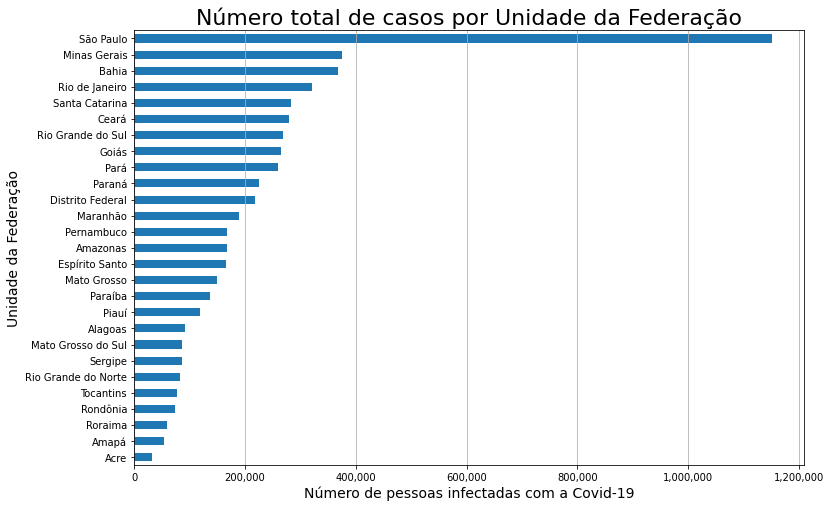

In [9]:
ax = states_df.confirmed.plot(kind="barh", figsize=(12,8))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.set_xlabel("Número de pessoas infectadas com a Covid-19", fontsize=14)
ax.set_ylabel("Unidade da Federação", fontsize=14)
plt.grid(axis='x')
plt.title("Número total de casos por Unidade da Federação", fontsize=22)